In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import numpy as np
import scipy as sp
from detection import eddyDetection
import ast
from tqdm import tqdm
from detection import full_inner_eddy_region_v2
from IPython.display import Video, display
from animation import animation_local_gif
from PIL import Image
import IPython.display as ipy_display
import ipywidgets as widgets

In [2]:
df = xr.open_dataset('C:/Users/eirik/Master/Data/new_dataset.nc')
df_eta = xr.open_dataset('C:/Users/eirik/Master/Data/Eta.nc')

In [3]:
# Inner domain
domain_center = [[-20,0],[72,73]]
OW_center = df['Okubo_Weiss']*(1/(10**(-9)))
eta_center = df_eta['Eta']
OW_center = OW_center.sel(X=slice(domain_center[0][0],domain_center[0][1]))
OW_center = OW_center.sel(Y=slice(domain_center[1][0],domain_center[1][1]))
OW_center = OW_center.sel(Z=-1)
eta_center = eta_center.sel(X=slice(domain_center[0][0],domain_center[0][1]))
eta_center = eta_center.sel(Y=slice(domain_center[1][0],domain_center[1][1]))

# Outer domain
eta = df_eta['Eta']
eta = eta.sel(X=slice(domain_center[0][0]-2,domain_center[0][1]+2))
eta = eta.sel(Y=slice(domain_center[1][0]-2,domain_center[1][1]+2))

# Resample data
# eta = eta.resample(time='0.5D').mean(dim='time')
# OW_center = OW_center.resample(time='0.5D').mean(dim='time')
# eta_center = eta_center.resample(time='0.5D').mean(dim='time')

# Define time extent
time = ['2018-01-01T00:00:00.000000000','2018-01-10T00:00:00.000000000']
eta = eta.sel(time=slice(time[0],time[1]))
eta_center = eta_center.sel(time=slice(time[0],time[1]))
OW_center = OW_center.sel(time=slice(time[0],time[1]))

display(eta)

<xarray.DataArray 'Eta' (time: 37, Y: 231, X: 510)>
[4358970 values with dtype=float64]
Coordinates:
  * X        (X) float64 -21.98 -21.93 -21.87 -21.82 ... 1.822 1.879 1.936 1.994
  * Y        (Y) float64 70.01 70.03 70.04 70.06 ... 74.89 74.92 74.95 74.99
    XC       (Y, X) float64 ...
    YC       (Y, X) float64 ...
  * time     (time) datetime64[ns] 2018-01-01 2018-01-01T06:00:00 ... 2018-01-10
Attributes:
    long_name:      free-surface_r-anomaly
    units:          m
    standard_name:  sea_surface_height_above_geoid
    _coordinates:   XC YC iter

# Running algorythm for eddy center location

In [4]:
# Set True to run, or read previously file made
run = input('Would you like to run a new dataset? y/n: ')
if run == 'y':
    run = True
elif run == 'n':
    run = False
if run:
    eddyLocation = []
    print('###Applying filter###')
    for i in range(len(eta)):
        eddyLocation.append(eddyDetection(eta_center[i],OW_center[i]))
        print('Processing: ',100*(i+1)/len(eta_center), '%')
    with open("eddyCenterpoints.txt",'w') as f:
        for time in range(len(eddyLocation)):
            if time != len(eddyLocation)-1:
                f.write(str(eddyLocation[time])+',')
            else:
                f.write(str(eddyLocation[time]))

else:
    print('###Loading previously saved eddy centerpoints###')
    with open("eddyCenterpoints.txt",'r') as f:
        data = f.read()
        eddyLocation = ast.literal_eval(data)

###Applying filter###


Generating Frames: 100%|██████████| 39/39 [00:20<00:00,  1.93it/s]


Skiped windows %: 90.59628895694469
Processing:  2.7027027027027026 %


Generating Frames: 100%|██████████| 39/39 [00:20<00:00,  1.93it/s]


Skiped windows %: 90.48219540022818
Processing:  5.405405405405405 %


Generating Frames: 100%|██████████| 39/39 [00:19<00:00,  1.98it/s]


Skiped windows %: 90.9325647030565
Processing:  8.108108108108109 %


Generating Frames: 100%|██████████| 39/39 [00:17<00:00,  2.17it/s]


Skiped windows %: 92.34972677595628
Processing:  10.81081081081081 %


Generating Frames: 100%|██████████| 39/39 [00:19<00:00,  1.97it/s]


Skiped windows %: 90.86651053864169
Processing:  13.513513513513514 %


Generating Frames: 100%|██████████| 39/39 [00:20<00:00,  1.89it/s]


Skiped windows %: 90.3801116915871
Processing:  16.216216216216218 %


Generating Frames: 100%|██████████| 39/39 [00:19<00:00,  2.03it/s]


Skiped windows %: 91.4249684741488
Processing:  18.91891891891892 %


Generating Frames: 100%|██████████| 39/39 [00:21<00:00,  1.80it/s]


Skiped windows %: 89.40731399747793
Processing:  21.62162162162162 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.69it/s]


Skiped windows %: 88.9029003783102
Processing:  24.324324324324323 %


Generating Frames: 100%|██████████| 39/39 [00:25<00:00,  1.55it/s]


Skiped windows %: 88.12826517744551
Processing:  27.027027027027028 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.64it/s]


Skiped windows %: 86.92728036990333
Processing:  29.72972972972973 %


Generating Frames: 100%|██████████| 39/39 [00:24<00:00,  1.62it/s]


Skiped windows %: 86.60901939590464
Processing:  32.432432432432435 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.66it/s]


Skiped windows %: 86.17065994115174
Processing:  35.13513513513514 %


Generating Frames: 100%|██████████| 39/39 [00:27<00:00,  1.40it/s]


Skiped windows %: 84.76550771632739
Processing:  37.83783783783784 %


Generating Frames: 100%|██████████| 39/39 [00:26<00:00,  1.49it/s]


Skiped windows %: 85.49810844892812
Processing:  40.54054054054054 %


Generating Frames: 100%|██████████| 39/39 [00:24<00:00,  1.58it/s]


Skiped windows %: 85.85840389119078
Processing:  43.24324324324324 %


Generating Frames: 100%|██████████| 39/39 [00:25<00:00,  1.53it/s]


Skiped windows %: 85.68426109409715
Processing:  45.945945945945944 %


Generating Frames: 100%|██████████| 39/39 [00:21<00:00,  1.79it/s]


Skiped windows %: 85.8704137392662
Processing:  48.648648648648646 %


Generating Frames: 100%|██████████| 39/39 [00:22<00:00,  1.71it/s]


Skiped windows %: 85.43805920855101
Processing:  51.351351351351354 %


Generating Frames: 100%|██████████| 39/39 [00:22<00:00,  1.71it/s]


Skiped windows %: 85.4320542845133
Processing:  54.054054054054056 %


Generating Frames: 100%|██████████| 39/39 [00:21<00:00,  1.78it/s]


Skiped windows %: 86.13463039692549
Processing:  56.75675675675676 %


Generating Frames: 100%|██████████| 39/39 [00:21<00:00,  1.78it/s]


Skiped windows %: 85.98450729598271
Processing:  59.45945945945946 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.63it/s]


Skiped windows %: 86.59700954782922
Processing:  62.16216216216216 %


Generating Frames: 100%|██████████| 39/39 [00:25<00:00,  1.53it/s]


Skiped windows %: 86.11661562481234
Processing:  64.86486486486487 %


Generating Frames: 100%|██████████| 39/39 [00:25<00:00,  1.55it/s]


Skiped windows %: 86.51894553533897
Processing:  67.56756756756756 %


Generating Frames: 100%|██████████| 39/39 [00:25<00:00,  1.53it/s]


Skiped windows %: 86.22470425749114
Processing:  70.27027027027027 %


Generating Frames: 100%|██████████| 39/39 [00:25<00:00,  1.53it/s]


Skiped windows %: 86.29676334594367
Processing:  72.97297297297297 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.64it/s]


Skiped windows %: 87.66588602654176
Processing:  75.67567567567568 %


Generating Frames: 100%|██████████| 39/39 [00:22<00:00,  1.71it/s]


Skiped windows %: 88.512580315859
Processing:  78.37837837837837 %


Generating Frames: 100%|██████████| 39/39 [00:22<00:00,  1.73it/s]


Skiped windows %: 88.9989791629136
Processing:  81.08108108108108 %


Generating Frames: 100%|██████████| 39/39 [00:22<00:00,  1.74it/s]


Skiped windows %: 88.94493484657418
Processing:  83.78378378378379 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.67it/s]


Skiped windows %: 89.18513180808263
Processing:  86.48648648648648 %


Generating Frames: 100%|██████████| 39/39 [00:23<00:00,  1.66it/s]


Skiped windows %: 88.4525310754819
Processing:  89.1891891891892 %


Generating Frames: 100%|██████████| 39/39 [00:22<00:00,  1.70it/s]


Skiped windows %: 89.10106287155467
Processing:  91.89189189189189 %


Generating Frames: 100%|██████████| 39/39 [00:20<00:00,  1.87it/s]


Skiped windows %: 90.46418062811506
Processing:  94.5945945945946 %


Generating Frames: 100%|██████████| 39/39 [00:21<00:00,  1.84it/s]


Skiped windows %: 90.09187533777697
Processing:  97.29729729729729 %


Generating Frames: 100%|██████████| 39/39 [00:20<00:00,  1.93it/s]

Skiped windows %: 90.99261394343362
Processing:  100.0 %


# Running algorythm to find inner eddy region

In [5]:
run = input('Would you like to run a new dataset? y/n: ')
if run == 'y':
    run = True
elif run == 'n':
    run = False

if run:
    eddy_centers = eddyLocation
    T = len(eddyLocation)*(len(eddyLocation[0][0]) + len(eddyLocation[0][1]))
    pbar = tqdm(total=T, desc="Running algorythm")
    eddies = xr.full_like(eta,fill_value=0)
    eddies = eddies.rename("EddyDetection")
    for time in range(len(eddyLocation)):
        # First run per time step
        
        
        eddyDataset = full_inner_eddy_region_v2(eta=eta[time],eddy_center=eddy_centers[time][0][0],warm=True,eddiesDataset=eddies[time])
        pbar.update(1)
        for i in range(1,len(eddy_centers[time][0])):
            eddyDataset = full_inner_eddy_region_v2(eta=eta[time],eddy_center=eddy_centers[time][0][i],warm=True,eddiesDataset=eddyDataset)
            pbar.update(1)
            
        for i in range(0,len(eddy_centers[time][1])):
            eddyDataset = full_inner_eddy_region_v2(eta=eta[time],eddy_center=eddy_centers[time][1][i],cold=True,eddiesDataset=eddyDataset)
            pbar.update(1)
            
        eddies[time] = eddyDataset
    eddies.to_netcdf('C:/Users/eirik/Master/Data/EddiesTest.nc')
else:
    eddies = xr.open_dataset('C:/Users/eirik/Master/Data/EddiesTest.nc')
    eddies = eddies['EddyDetection']

Running algorythm:  24%|██▍       | 279/1147 [03:16<12:01,  1.20it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  34%|███▎      | 385/1147 [04:37<10:18,  1.23it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  37%|███▋      | 424/1147 [05:10<10:03,  1.20it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  40%|███▉      | 457/1147 [05:40<12:04,  1.05s/it]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  43%|████▎     | 494/1147 [06:07<09:52,  1.10it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  43%|████▎     | 495/1147 [06:09<10:27,  1.04it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  46%|████▋     | 532/1147 [06:37<10:14,  1.00it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  46%|████▋     | 533/1147 [06:37<08:51,  1.16it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  49%|████▉     | 567/1147 [07:04<09:19,  1.04it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  50%|████▉     | 568/1147 [07:05<07:16,  1.33it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  52%|█████▏    | 601/1147 [07:36<11:54,  1.31s/it]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  55%|█████▌    | 634/1147 [07:59<05:30,  1.55it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  56%|█████▌    | 640/1147 [08:04<06:55,  1.22it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  60%|██████    | 693/1147 [08:52<06:02,  1.25it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  63%|██████▎   | 723/1147 [09:17<04:35,  1.54it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  63%|██████▎   | 726/1147 [09:18<03:43,  1.88it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  66%|██████▋   | 760/1147 [09:43<03:08,  2.05it/s]

Error in X domain: No change in eta detected. To low extent etc
Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  69%|██████▉   | 791/1147 [10:09<02:58,  1.99it/s]

Error in X domain: No change in eta detected. To low extent etc


Running algorythm:  70%|███████   | 803/1147 [10:15<02:13,  2.57it/s]

Error in Y domain: No change in eta detected. To low extent etc
Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  73%|███████▎  | 833/1147 [10:35<03:01,  1.73it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  76%|███████▌  | 869/1147 [10:57<01:50,  2.51it/s]

Error in Y domain: No change in eta detected. To low extent etc
Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  78%|███████▊  | 900/1147 [11:19<01:56,  2.13it/s]

Error in Y domain: No change in eta detected. To low extent etc


Running algorythm:  79%|███████▊  | 902/1147 [11:19<01:30,  2.70it/s]

Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  81%|████████▏ | 933/1147 [11:41<01:32,  2.33it/s]

Error in Y domain: No change in eta detected. To low extent etc
Error in XY domain: No change in eta detected. To low extent etc


Running algorythm:  98%|█████████▊| 1121/1147 [13:51<00:10,  2.54it/s]

Error in Y domain: No change in eta detected. To low extent etc


Running algorythm:  99%|█████████▉| 1137/1147 [14:06<00:07,  1.35it/s]

Error in X domain: No change in eta detected. To low extent etc


Running algorythm: 1150it [14:15,  2.01it/s]                          

Error in Y domain: No change in eta detected. To low extent etc


Running algorythm: 1174it [14:33,  2.19it/s]

Error in Y domain: No change in eta detected. To low extent etc


Running algorythm: 1191it [14:49,  1.58it/s]

Error in X domain: No change in eta detected. To low extent etc


Running algorythm: 1199it [14:55,  1.68it/s]

Error in Y domain: No change in eta detected. To low extent etc


Running algorythm: 1218it [15:13,  1.22it/s]

Error in X domain: No change in eta detected. To low extent etc


Running algorythm: 1226it [15:19,  1.46it/s]

Generating Frames: 75it [00:33,  2.25it/s]


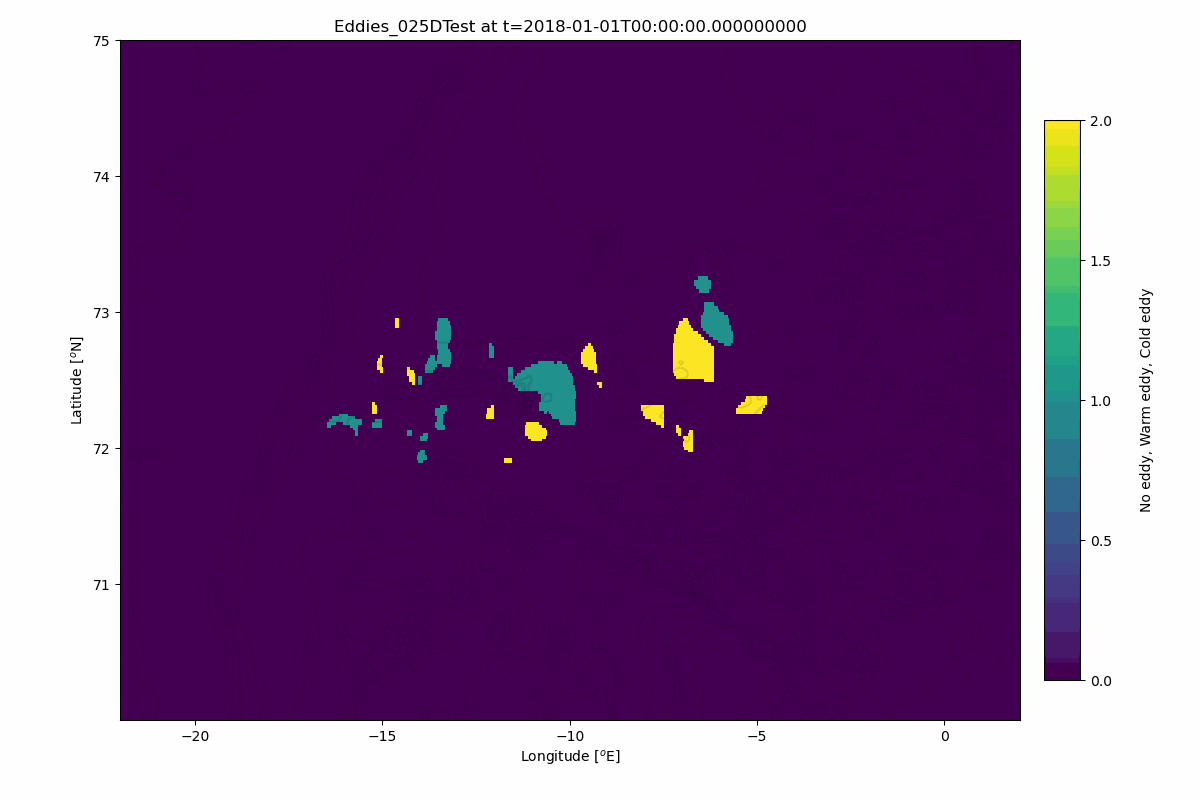

In [6]:
df_depth = xr.open_dataset('C:/Users/eirik/Master/Data/depth.nc')
depth = df_depth['Depth'].sel(X=slice(eddies.X[0], eddies.X[-1])).sel(Y=slice(eddies.Y[0], eddies.Y[-1]))

from IPython.display import Image, display
animation_local_gif(data=eddies,name='Eddies_025DTest',unit='No eddy, Warm eddy, Cold eddy',depth=depth,interval=150)
display(Image('Eddies_025DTest.gif'))

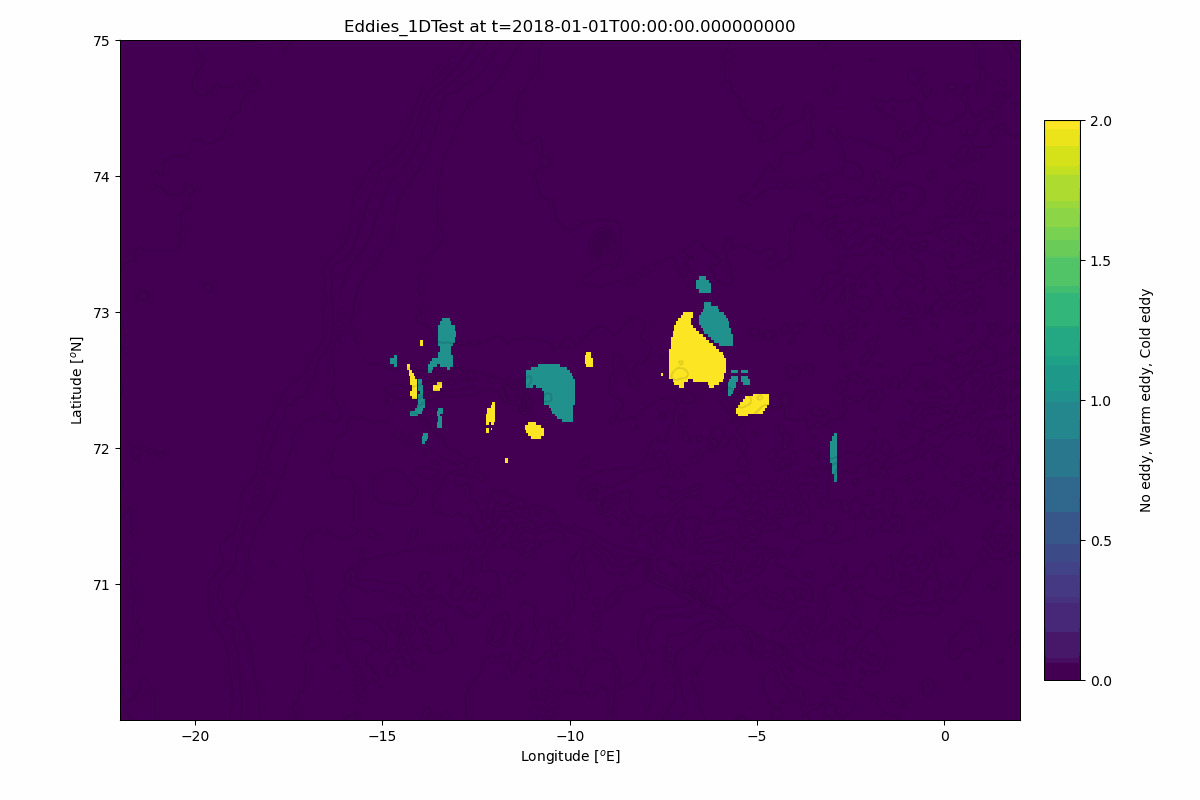

In [7]:
df_depth = xr.open_dataset('C:/Users/eirik/Master/Data/depth.nc')
depth = df_depth['Depth'].sel(X=slice(eddies.X[0], eddies.X[-1])).sel(Y=slice(eddies.Y[0], eddies.Y[-1]))

from IPython.display import Image, display
# animation_local_gif(data=eddies,name='Eddies_1DTest',unit='No eddy, Warm eddy, Cold eddy',depth=depth,interval=200)
display(Image('Eddies_1DTest.gif'))